In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.7 MB/s eta 0:00:00



image 1/1 /content/testRoad.png: 640x640 7 potholes, 222.8ms
Speed: 5.6ms preprocess, 222.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


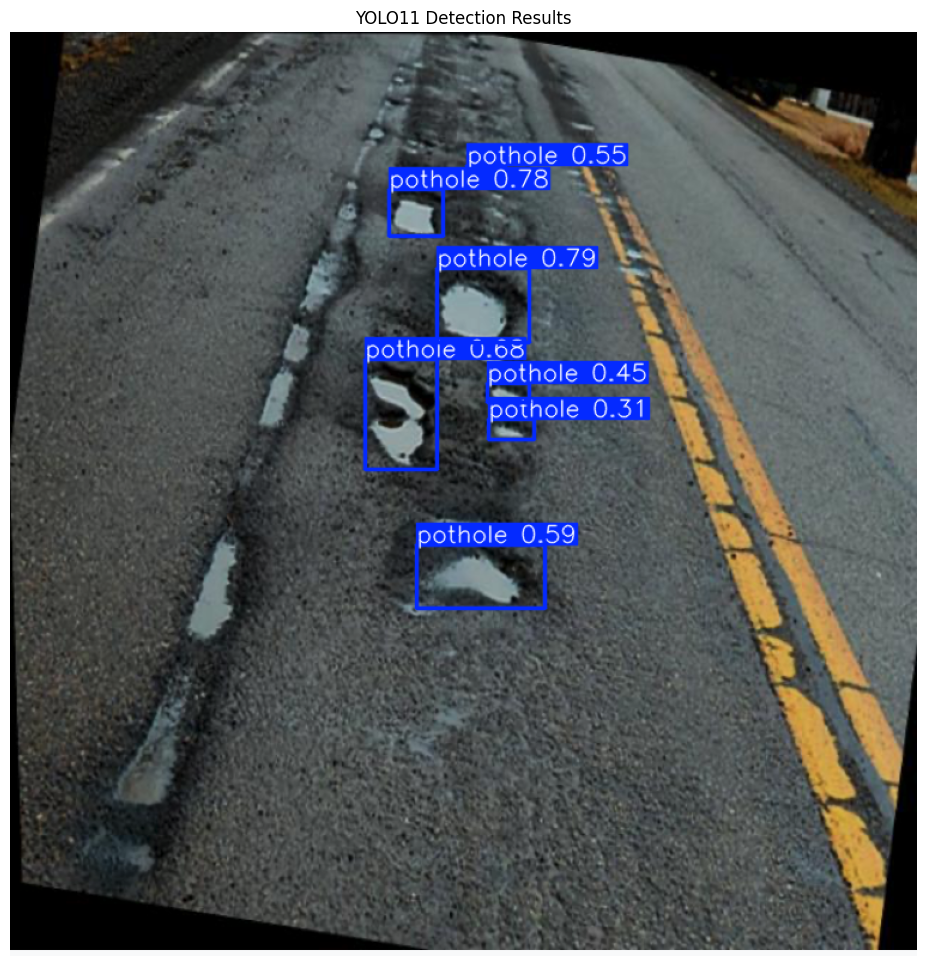

--------------------------------------------------
Analysis Complete for: /content/testRoad.png
Number of objects detected: 7
--------------------------------------------------
Object 1: pothole | Confidence: 0.79
Object 2: pothole | Confidence: 0.78
Object 3: pothole | Confidence: 0.68
Object 4: pothole | Confidence: 0.59
Object 5: pothole | Confidence: 0.55
Object 6: pothole | Confidence: 0.45
Object 7: pothole | Confidence: 0.31
--------------------------------------------------


In [8]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 1. Load the model
# Make sure 'best.pt' is in your current directory or provide the full path
model = YOLO('best.pt')

# 2. Run prediction
# results will contain all detection data (boxes, masks, etc.)
results = model.predict(source='/content/testRoad.png', conf=0.25)

# 3. Process and display the results
# results[0].plot() returns a BGR image (numpy array) with all detections drawn
res_plotted = results[0].plot()

# Convert BGR (OpenCV format) to RGB (Matplotlib format) for correct colors
res_rgb = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)

# Display the image on screen
plt.figure(figsize=(12, 12))
plt.imshow(res_rgb)
plt.axis('off') # Hide axes for a cleaner look
plt.title("YOLO11 Detection Results")
plt.show()

# 4. English Documentation & Console Output
print("-" * 50)
print(f"Analysis Complete for: /content/testRoad.png")
print(f"Number of objects detected: {len(results[0])}")
print("-" * 50)

# Iterate through detections and print details
for i, box in enumerate(results[0].boxes):
    cls = int(box.cls[0])       # Class ID
    label = model.names[cls]    # Class Name (e.g., 'pothole')
    conf = float(box.conf[0])   # Confidence score

    print(f"Object {i+1}: {label} | Confidence: {conf:.2f}")

print("-" * 50)